# Breve introducción a Machine Learning

## Conceptos importantes

Dentro del mundo de Machine Learning, generalmente el primer reto será identificar el tipo de modelo que deberíamos de utilizar. Lo primero que deberíamos de notar es si nos enfrentamos a un problema en el que contemos con una variable de respuesta, eso será escencial para saber si debemos de considerar el uso de algoritmos de Aprendizaje Supervisado o No supervisado.





![texto_alternativo](unsupervised.png)

Por otro lado, como se pudo notar en el ejemplo de la clase anterior. Al utilizar este tipo de técnicas necesitamos dividir nuestro data set en un conjunto que sirva como entrenamiento (__train__) y otra porción de los datos que funcione para probar la eficacia de nuestro algoritmo (__test__). Esto es muy relevante dado que seguramente una implementación de este tipo funcionará para la toma de decisiones de eventos futuros, por lo que es fundamental evitar que el modelo funcione sumamente bien en este dataset pero que con otra muestra aleatoria su desempeño sea sumamente malo. 


![Languages](complexity_tradeoff.png)

Otro trade off importante ocurre en cuanto a la interpretabilidad del modelo y su poder predictivo. Hay una relación negativa entre estas características y es importante considerar si es preciso entender la relación entre las variables o si lo realmente importante es que podamos predecir con gran precisión.

![Languages](The-trade-off-interpretability.png)

## Supervised Learning (with labels)



### Paramétricos

#### Linear Regresion

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from mpl_toolkits.mplot3d import axes3d

In [2]:
df = pd.read_csv("https://www.statlearning.com/s/Advertising.csv", index_col=0)
df.head(5)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


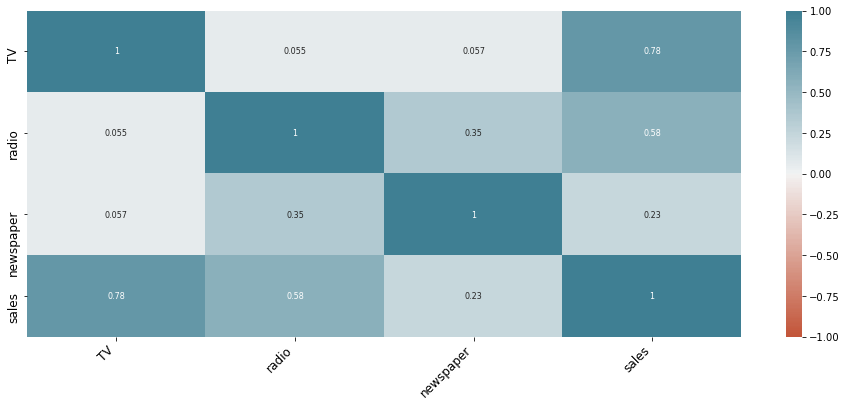

In [3]:
correlaciones = df.corr()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 6))

sns.heatmap(
    correlaciones,
    annot     = True,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 12)

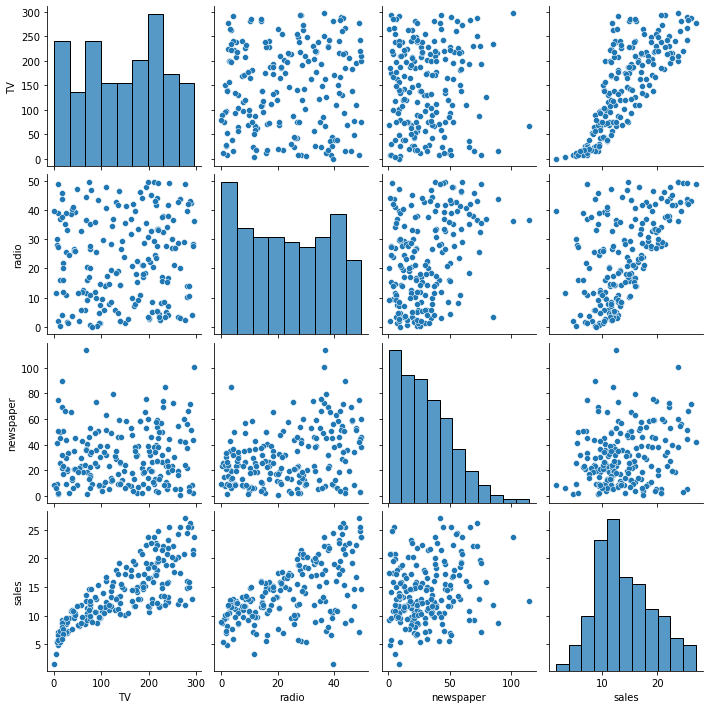

In [4]:
sns.pairplot(df)

In [5]:
X = scale(df["TV"], with_mean=True, with_std=False).reshape(-1,1)
Y = df["sales"]

X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = .20, random_state = 0)

In [6]:
ols = LinearRegression()
ols.fit(X_train, y_train)



LinearRegression()

In [7]:
# Create grid coordinates for plotting
B0 = np.linspace(ols.intercept_-2, ols.intercept_+2, 50)
B1 = np.linspace(ols.coef_-0.02, ols.coef_+0.02, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =((y_train - (xx[i,j]+X_train.ravel()*yy[i,j]))**2).sum()/1000

# Minimized RSS
min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
min_rss = np.sum((ols.intercept_+ols.coef_*X_train - y_train.values.reshape(-1,1))**2)/1000
min_rss

1.6987581465823764

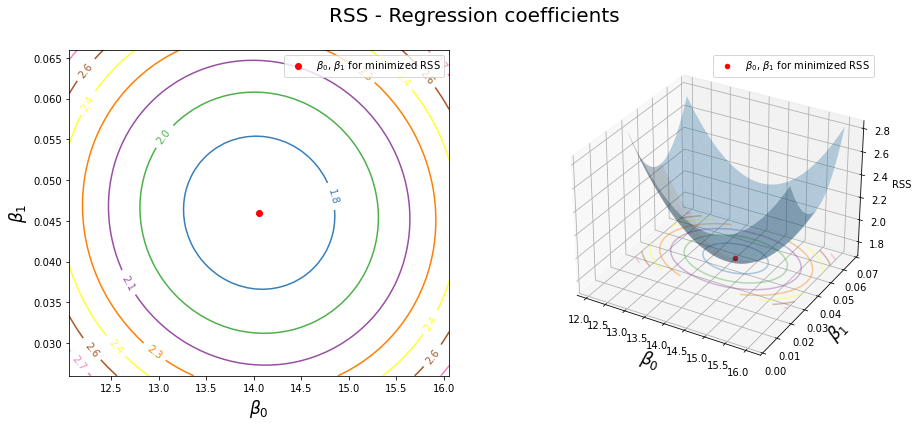

In [8]:
fig = plt.figure(figsize=(15,6))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, cmap=plt.cm.Set1)
ax1.scatter(ols.intercept_, ols.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.Set1,
            alpha=0.4)
ax2.scatter3D(ols.intercept_, ols.coef_[0], min_rss, c='r', label=min_RSS)
ax2.set_zlabel('RSS')
ax2.set_zlim(Z.min(),Z.max())
ax2.set_ylim(0.00,0.07)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\beta_0$', fontsize=17)
    ax.set_ylabel(r'$\beta_1$', fontsize=17)
    ax.legend()

In [9]:
# Create grid coordinates for plotting
B0 = np.linspace(ols.intercept_-2, ols.intercept_+2, 50)
B1 = np.linspace(ols.coef_-0.02, ols.coef_+0.02, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =((y_test - (xx[i,j]+X_test.ravel()*yy[i,j]))**2).sum()/1000

# Minimized RSS
min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
min_rss = np.sum((ols.intercept_+ols.coef_*X_test - y_test.values.reshape(-1,1))**2)/1000
min_rss

0.4074472773812089

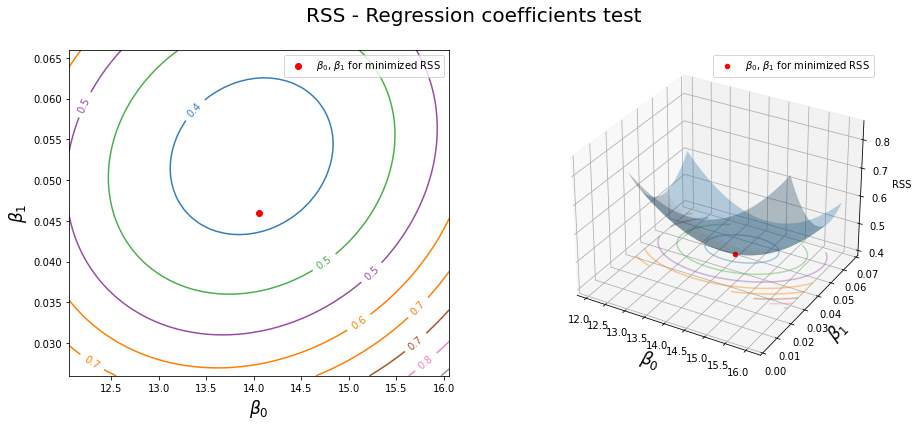

In [10]:
fig = plt.figure(figsize=(15,6))
fig.suptitle('RSS - Regression coefficients test', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, cmap=plt.cm.Set1)
ax1.scatter(ols.intercept_, ols.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.Set1,
            alpha=0.4)
ax2.scatter3D(ols.intercept_, ols.coef_[0], min_rss, c='r', label=min_RSS)
ax2.set_zlabel('RSS')
ax2.set_zlim(Z.min(),Z.max())
ax2.set_ylim(0.00,0.07)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\beta_0$', fontsize=17)
    ax.set_ylabel(r'$\beta_1$', fontsize=17)
    ax.legend()

In [11]:
X = df[['radio', 'TV']]
y = df["sales"]

ols.fit(X,y)


LinearRegression()

In [12]:
Radio = np.arange(0,50)
TV = np.arange(0,300)

B1, B2 = np.meshgrid(Radio, TV, indexing='xy')
Z = np.zeros((TV.size, Radio.size))

for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(ols.intercept_ + B1[i,j]*ols.coef_[0] + B2[i,j]*ols.coef_[1])

Text(0.5, 0, 'Sales')

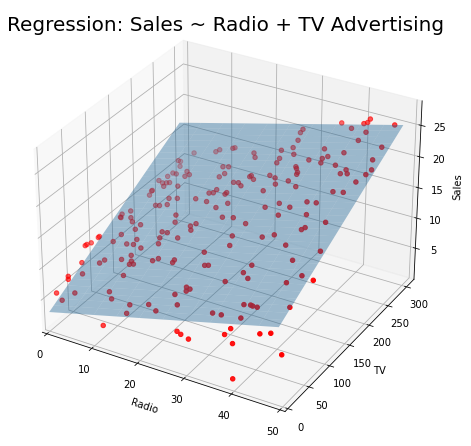

In [13]:
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression: Sales ~ Radio + TV Advertising', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.4)
ax.scatter3D(df.radio, df.TV, df.sales, c='r')

ax.set_xlabel('Radio')
ax.set_xlim(0,50)
ax.set_ylabel('TV')
ax.set_ylim(ymin=0)
ax.set_zlabel('Sales')

![Languages](Non_parametric.png)

## No paramétricos

### Regression Tree

In [14]:
!pip install pydotplus

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from IPython.display import Image

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import six
import sys
sys.modules['sklearn.externals.six'] = six

from sklearn.externals.six import StringIO  
%matplotlib inline
plt.style.use('ggplot')


In [16]:
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO ()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)


In [17]:
df = pd.read_csv("https://gist.githubusercontent.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad/raw/d9bcf657f97201394a59fffd801c44347eb7e28d/Hitters.csv")
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  263 non-null    object 
 1   AtBat       263 non-null    int64  
 2   Hits        263 non-null    int64  
 3   HmRun       263 non-null    int64  
 4   Runs        263 non-null    int64  
 5   RBI         263 non-null    int64  
 6   Walks       263 non-null    int64  
 7   Years       263 non-null    int64  
 8   CAtBat      263 non-null    int64  
 9   CHits       263 non-null    int64  
 10  CHmRun      263 non-null    int64  
 11  CRuns       263 non-null    int64  
 12  CRBI        263 non-null    int64  
 13  CWalks      263 non-null    int64  
 14  League      263 non-null    object 
 15  Division    263 non-null    object 
 16  PutOuts     263 non-null    int64  
 17  Assists     263 non-null    int64  
 18  Errors      263 non-null    int64  
 19  Salary      263 non-null    f

Text(0.5, 0, 'Log(Salary)')

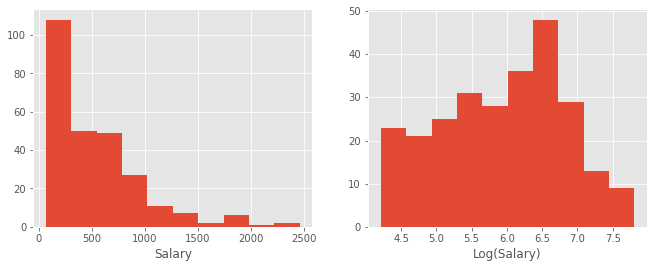

In [18]:
X = df[['Years', 'Hits']]
y = np.log(df.Salary)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11,4))
ax1.hist(df.Salary)
ax1.set_xlabel('Salary')
ax2.hist(y)
ax2.set_xlabel('Log(Salary)')

In [19]:
dtree = DecisionTreeRegressor(max_leaf_nodes=3)
dtree.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=3)

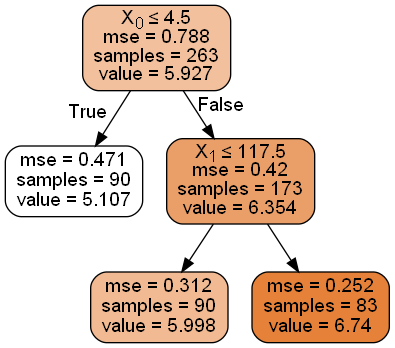

In [20]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Text(11, 170, 'R3')

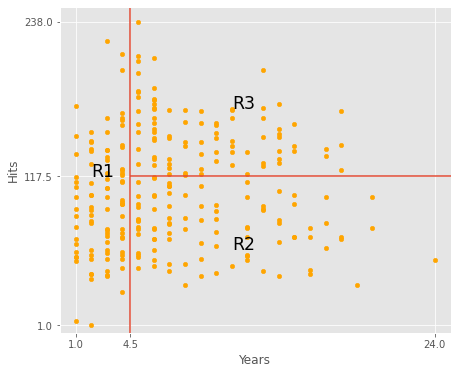

In [21]:
df.plot('Years', 'Hits', kind='scatter', color='orange', figsize=(7,6))
plt.xlim(0,25)
plt.ylim(ymin=-5)
plt.xticks([1, 4.5, 24])
plt.yticks([1, 117.5, 238])
plt.vlines(4.5, ymin=-5, ymax=250)
plt.hlines(117.5, xmin=4.5, xmax=25)
plt.annotate('R1', xy=(2,117.5), fontsize='xx-large')
plt.annotate('R2', xy=(11,60), fontsize='xx-large')
plt.annotate('R3', xy=(11,170), fontsize='xx-large')

### Clasification Tree

In [22]:
heart_df = pd.read_csv("https://www.statlearning.com/s/Heart.csv", index_col=0)
heart_df = heart_df.dropna()
heart_df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [23]:
heart_df.ChestPain = pd.factorize(heart_df.ChestPain)[0]
heart_df.Thal = pd.factorize(heart_df.Thal)[0]

In [24]:
X = heart_df.drop('AHD', axis=1)
y = pd.factorize(heart_df.AHD)[0]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)


dtree = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=6, max_features=3)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_features=3, max_leaf_nodes=6)

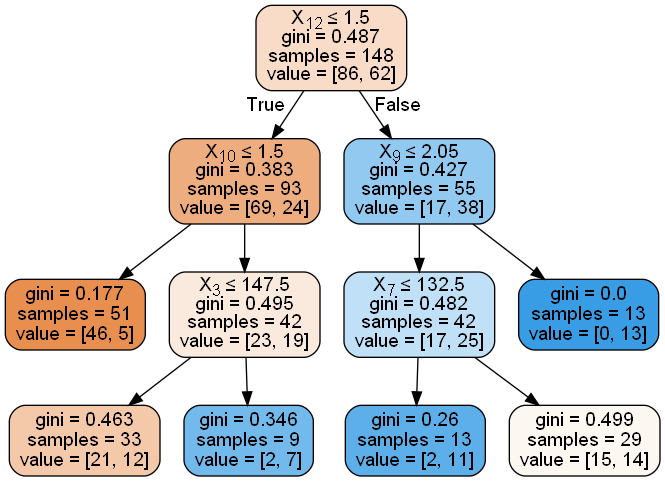

In [26]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [27]:
pred = dtree.predict(X_test)

In [28]:
cm = pd.DataFrame(confusion_matrix(y_test, pred).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,72,46
Yes,2,29


In [29]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.61      0.97      0.75        74
           1       0.94      0.39      0.55        75

    accuracy                           0.68       149
   macro avg       0.77      0.68      0.65       149
weighted avg       0.77      0.68      0.65       149

